# Reward Function Testing

It is a truth universally acknowledged, that a good reward function is the key to Reinforcement Learning. This notebook aims to test various reward functions to generally propose a good reward function for DSEM.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import autogluon as ag
import rpy2.robjects as ro
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, ConfirmatoryFactorAnalyzer, ModelSpecificationParser
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

import sys
sys.path.insert(0, '..')
from SEM import SemModel

## Read Data

In [2]:
# Read excel data to Dataframe.
df = pd.read_excel('../data/online_education_learning_focus.xlsx')

# Remove incomplete response.
df.dropna(inplace=True)

# Show basic information on this dataset.
# This is a dataset provided by a course from PKU summer school 
# and it's not public, so please do not spread it.
# I choose this data because I ran detailed OLS and SEM on this dataset.
df.describe()

,18、(提前提供课程资料，方便学生课前预习),18、(重视学生的课堂出勤考评),18、(对学生作业及学业表现给予及时有效的反馈),18、(课堂引入互动环节，注重学生参与（提问讨论）),18、(让学生个体或小组选择主题，完成讨论、设计、研究展示),18、(课后为学生提供辅导答疑),18、(课程成绩考核除考试外，纳入课堂参与、小论文、课堂研究展示等过程性评价),19、(课前课后预复习),19、(课堂上提问或主动回答问题),19、(积极参与小组合作学习或课程有关的问题),...,20、(课前提供了充足的课程阅读文献资料),20、(课前提供了详尽的课程说明（包括教学平台使用说明）),20、(课程内容浓缩微型化，适应在线学习注意力时长并合理设置课间休息),20、(课程内容呈现形式更为多样化),20、(课程增加和优化学生讨论或观点交流环节),20、(课程提升了学生合作学习),20、(课程教学进度合理，适合学生理解),20、(课程增加了课外阅读或作业要求等挑战度),20、(课程开通了微信群、公邮等辅助交流工具),21、相较于以往的面授课程，在线教学总体质量：
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,5.008200,5.149983,4.975401,4.922446,4.682269,4.820294,4.972668,4.156474,4.049880,4.459857,...,4.165699,4.265801,4.064913,4.181756,4.096003,4.005466,4.102494,4.203963,4.519986,5.679535
std,1.155362,1.105377,1.122112,1.146691,1.262600,1.205120,1.136274,1.310655,1.336014,1.207891,...,1.355306,1.298194,1.353922,1.341450,1.347135,1.385146,1.289218,1.277230,1.230255,2.336185
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
50%,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,7.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,10.000000


## Conventional SEM

After loading this dataset, let's play with the conventional SEM. It is a truth universally acknowledged, that SEM is rather confirmative than explorative. So the very only way to play with the conventional SEM is to run SEM on a manually proposed model.

Therefore, we use the model from lavaan (a package in R) official tutorial as an example.

### Decide How Many Factors to Use

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


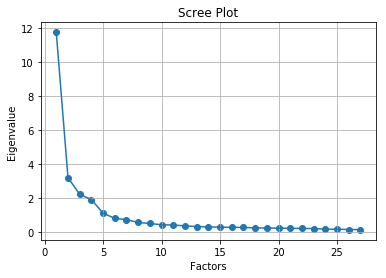

In [10]:
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


Total Variance Explained

[0.25284557 0.44925866 0.58802421 0.65731905]


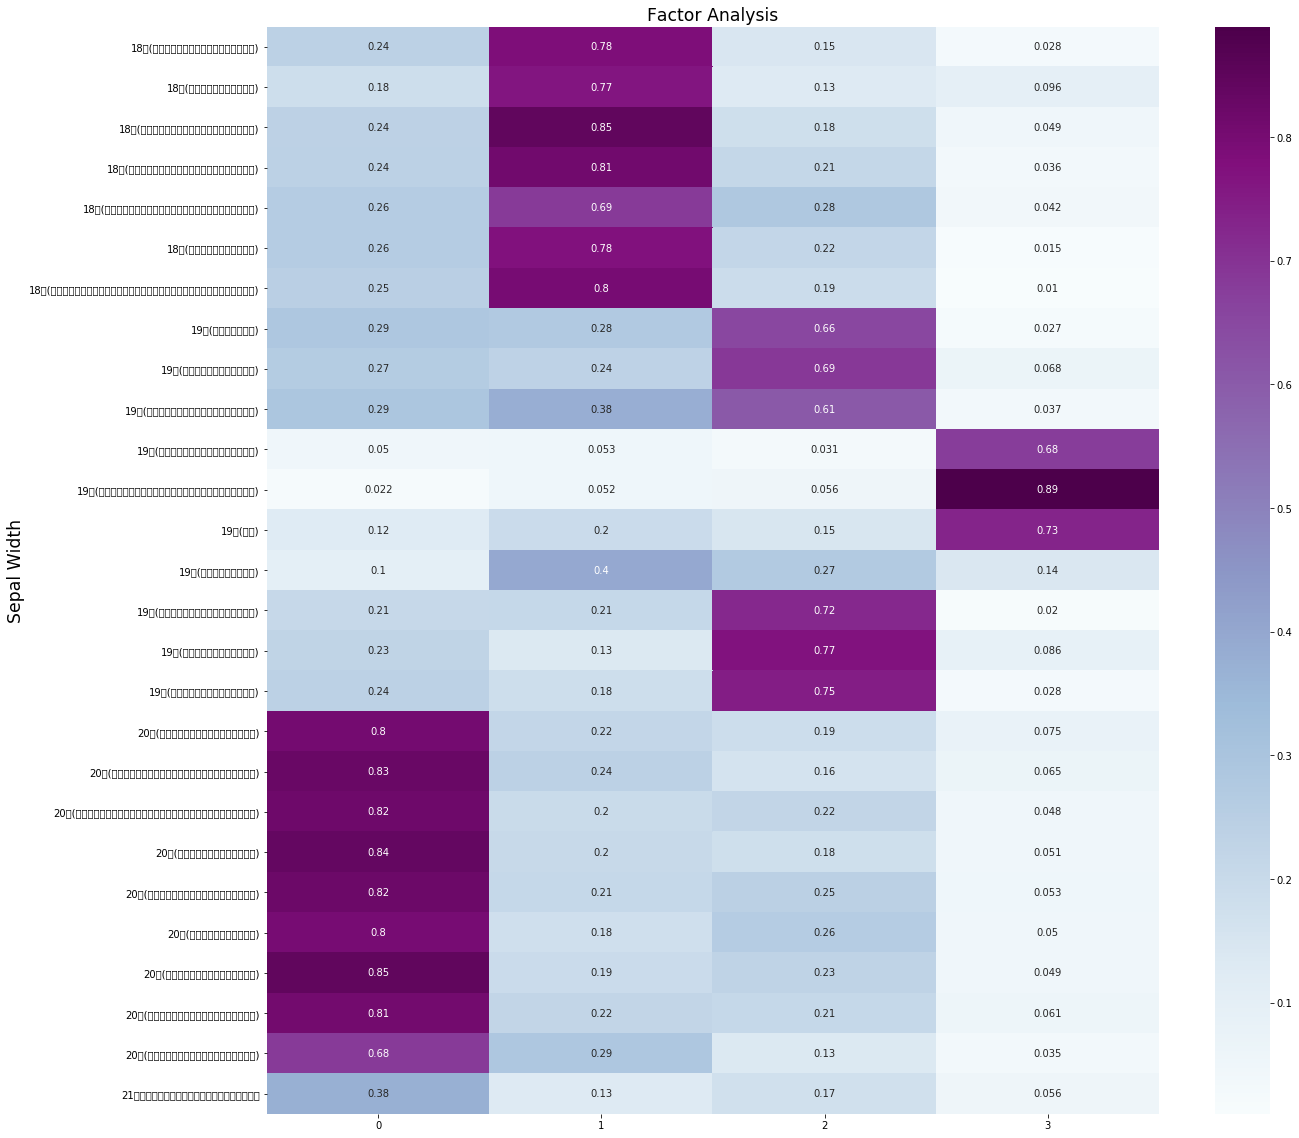

In [13]:
# Show how variables contribute to those 3 factors.
fa = FactorAnalyzer(4, rotation="varimax")
fa.fit(df)

# Plot the heatmap.
df_cm = pd.DataFrame(np.abs(fa.loadings_), index=df.columns)
plt.figure(figsize = (20,20))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
plt.title('Factor Analysis', fontsize='xx-large')
plt.ylabel('Sepal Width', fontsize='xx-large')

# The higher TVE is, the better.
print('Total Variance Explained\n')
print(fa.get_factor_variance()[2])

## Helper Functions

This section is no big deal. It just defines several helper functions so that we can focus on the reward function in latter sections.

In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased')

INFO:root:Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
INFO:root:Did not find a '/' or '\' in the name. Assume to download model from server.
INFO:root:Downloading sentence transformer model from https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/distiluse-base-multilingual-cased.zip and saving it at /Users/qizy/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_distiluse-base-multilingual-cased.zip
100%|██████████| 504M/504M [15:40<00:00, 536kB/s]     
INFO:root:Load SentenceTransformer from folder: /Users/qizy/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_distiluse-base-multilingual-cased.zip
INFO:transformers.configuration_utils:loading configuration file /Users/qizy/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_distiluse-base-multilingual-cased.zip/

In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

## Vanilla Method

This is the baseline using the most frequently used two indexes in social science. In this approach, the RL converges sometimes, while it just blew up in other times.

# NAS Approach

## Specify the Search Space

In [ ]:
factorNum = 4
varNames = df.columns
varNum = len(varNames)

searchVar = dict(zip(
    [str(i) for i in range(varNum)], 
    [ag.space.Categorical(*list(range(factorNum))) for i in range(varNum)]))

covariance = np.cov(df, rowvar=False)

# Arg model_dict show be formatted as follow:
# model_dict = {'Factor1': ['Val1', 'Val2'], 'Factor2': ['Val3', 'Val4']}
def evaluateSolution(model_dict, verbose=False):
    model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df, model_dict)

    cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False) 
    cfa.fit(df.values)
    
    if (verbose):
        print('AIC: %f' % cfa.aic_)
        print('BIC: %f' % cfa.bic_)
        print('Log Likehood: %f' % cfa.log_likelihood_)
        print('Loadings: ', cfa.loadings_)
    
    AVE = np.sum(cfa.loadings_)
    varianceResedual = np.sum(np.abs(cfa.get_model_implied_cov() - covariance)) / 20
    
    return AVE - varianceResedual

@ag.args(**searchVar)
def rl_simulation(args, reporter):
    model_dict = dict(zip(
        [str(i) for i in range(factorNum)], 
        [[] for i in range(factorNum)]))
        
    for var, factor in args.items():
        if (var == 'task_id'): continue
        model_dict[str(factor)].append(varNames[int(var)])
    
    reward = evaluateSolution(model_dict)
    
    reporter(reward=reward)

## Use Random Search as Another Baseline

In [ ]:
random_scheduler = ag.scheduler.FIFOScheduler(rl_simulation,
                                              resource={'num_cpus': 1, 'num_gpus': 0},
                                              num_trials=100,
                                              reward_attr='reward')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_scheduler.run()
    random_scheduler.join_jobs()
    
print('Best config: {}, best reward: {}'.format(random_scheduler.get_best_config(), random_scheduler.get_best_reward()))

## RL NAS

In [ ]:
rl_scheduler = ag.scheduler.RLScheduler(rl_simulation,
                                        resource={'num_cpus': 1, 'num_gpus': 0},
                                        num_trials=100,
                                        reward_attr='reward',
                                        controller_batch_size=4,
                                        controller_lr=5e-3,)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rl_scheduler.run()
    rl_scheduler.join_jobs()
    
print('Best config: {}, best reward: {}'.format(rl_scheduler.get_best_config(), rl_scheduler.get_best_reward()))

## Plot the Learning Curve

In [ ]:
results_rl = [v[0]['reward'] for v in rl_scheduler.training_history.values()]
results_random = [v[0]['reward'] for v in random_scheduler.training_history.values()]

results1 = [np.max(results_random[i:i+10]) for i in range(0, len(results_random), 10)]
results2 = [np.max(results_rl[i:i+10]) for i in range(0, len(results_rl), 10)]

plt.plot(range(len(results2)), results2, range(len(results1)), results1)

# Compare Those Results

## Evaluate the Solution from Conventional CFA

In [ ]:
convSolution = {str(i): [] for i in range(factorNum)}

for val, fac in enumerate(np.argmax(np.abs(fa.loadings_), axis=1)):
    convSolution[str(fac)].append(varNames[val])

print('Index: %f' % evaluateSolution(convSolution))

## Evaluate the Solution from Random Search

In [ ]:
randSolution = {str(i): [] for i in range(factorNum)}

randSolutionFA = random_scheduler.get_best_config()
for val, fac in randSolutionFA.items():
    randSolution[str(fac)].append(varNames[int(val.split('▁')[0])])
    
print('Index: %f' % evaluateSolution(randSolution))

## Evaluate the Solution from RL Search

In [ ]:
reinSolution = {str(i): [] for i in range(factorNum)}

reinSolutionFA = rl_scheduler.get_best_config()
for val, fac in reinSolutionFA.items():
    reinSolution[str(fac)].append(varNames[int(val.split('▁')[0])])

print('Index: %f' % evaluateSolution(reinSolution))

## Show the Result from RL NAS

In [ ]:
for i in reinSolution.keys():
    print('The %sst factor include the following variables' % i)
    for val in reinSolution[i]:
        print(val)